Contents
  - [jQuery dataTables¶](#jQuery-dataTables)
  - [Widgets¶](#Widgets)
  - [Matplotlib, SVG, and styles¶](#Matplotlib,-SVG,-and-styles)
  - [Youtube¶](#Youtube)
  - [Matplotlib dynamic update and 3D¶](#Matplotlib-dynamic-update-and-3D)
  - [Pandas dataframes¶](#Pandas-dataframes)
  - [TOC¶](#TOC)

# jQuery dataTables

In [1]:
%%html
<link rel="stylesheet" type="text/css" href="http://cdn.datatables.net/1.9.3/css/jquery.dataTables.css">
<script type="text/javascript" charset="utf8" src="http://cdn.datatables.net/1.9.3/js/jquery.dataTables.js"></script>

<div id="mydiv">
<table>
<thead>
<tr>
<th>A</th>
<th>B</th>
</tr>
</thead>
<tbody>
<tr>
<td>1</td>
<td>2</td>
</tr>
<tr>
<td>3</td>
<td>4</td>
</tr>
</tbody>
</table>
</div>

<script>
//$.getScript("http://cdn.datatables.net/1.9.3/js/jquery.dataTables.js");
$('#mydiv table').dataTable();
//$(document).ready(function(){
//    $('#mydiv table').dataTable();
//});
</script>


A,B
1,2
3,4


# Widgets

In [1]:
import ipywidgets; ipywidgets.__version__

'7.0.0'

In [2]:
import widgetsnbextension; widgetsnbextension.__version__

'3.0.2'

In [6]:
from ipywidgets import IntSlider, interact
from IPython.display import display
slider = IntSlider(min=1, max=10)
display(slider)

A Jupyter Widget

In [8]:
def square(num=1):
        print("{} squared is {}".format(num, num*num))
interact(square, num=5);


A Jupyter Widget

In [9]:
?ipywidgets

# Matplotlib, SVG, and styles

In [2]:
import matplotlib
import numpy
from io import BytesIO
from IPython.display import HTML, SVG

In [3]:
matplotlib.use('svg')
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.sans-serif']# = 'sans-serif'
#plt.rcParams['font.family']

['DejaVu Sans',
 'Bitstream Vera Sans',
 'Computer Modern Sans Serif',
 'Lucida Grande',
 'Verdana',
 'Geneva',
 'Lucid',
 'Arial',
 'Helvetica',
 'Avant Garde',
 'sans-serif']

In [4]:
plt.rcParams['font.sans-serif'] = 'Arial'

In [60]:
from io import BytesIO
def pltsvg():
    imgdata = BytesIO()
    plt.savefig(imgdata)
    imgdata.seek(0)
    display(SVG(data=imgdata.read()))

In [15]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [45]:
%%html
<style>
/*
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
*/
figure div {
    width: auto !important;
    display: block;
}
figcaption {
    text-align: center;
}
</style>

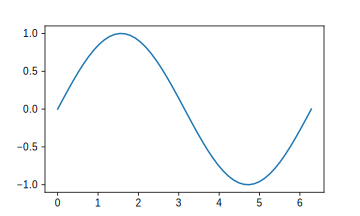

In [61]:
x = numpy.linspace(0,2*numpy.pi)
y = numpy.sin(x)
plt.figure(figsize=(5,3))
plt.plot(x,y)
pltsvg()
plt.close('all')

In [62]:
%%HTML
<script>
// There is a div surrounding the svg, so select it
$("svg").parent().each(function(){
    // apply style for centering
    $(this).css({"width":"auto","display":"block"})
      // Wrap a figure (returns the original div)
      .wrap("<figure></figure>")
      // Add a caption
      .after("<figcaption>" + $("g:first").attr("id")
             + " Here is a caption</figcaption>");
});
// Directly manipulate styles in the image
$("#matplotlib\\.axis_2 text").css({"stroke":"none","fill":"red"});
console.log("OK");
</script>

# Youtube

In [54]:
from IPython.display import YouTubeVideo

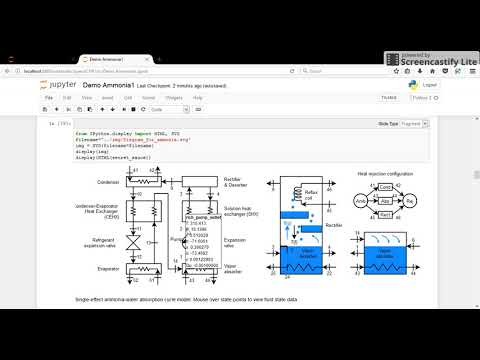

In [58]:
YouTubeVideo('KO1pO4zR578',width=560)

# Matplotlib dynamic update and 3D

In [46]:
# Puts plots in a pop-up window
%matplotlib qt5

In [47]:
%%html
<!-- This will get a table inserted by the next cell -->
<div id="myoutputdiv">
</div>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import clear_output, HTML
import tabulate

class myfunclass:
    def __init__(self):
        self.x = np.linspace(0, 1*np.pi, 10)
        self.y = np.sin(self.x)

        self.phaseloop = np.linspace(0, 10*np.pi, 500)
        self.dothese = [self.update_state]
        
        self.fig = plt.figure()
        self.fig.show()
        plt.ion()
        ax = self.fig.add_subplot(111)
        self.line1, = ax.plot(self.x, self.y, 'r-') # Returns a tuple of line objects, thus the comma

    def update_state(self,i):
        phase = self.phaseloop[i]
        self.y = np.sin(self.x + phase)
    def update_notebook(self,i):
        clear_output()
        html_out = tabulate.tabulate(zip(self.x,self.y),tablefmt='html')
        display(HTML("""<script id="mysecret" type="text/plain">
        Iteration {} <br/>
        {}
        </script>
        <script>
        $('#myoutputdiv').html($('#mysecret').html());
        //$('#mysecret').parent().parent().remove();
        </script>
        """.format(i, html_out)))
    def update_plot(self, i):    
        self.line1.set_ydata(self.y)
        self.fig.canvas.draw()
    def update(self,i):
        for f in self.dothese:
            f(i)


myfunobject = myfunclass()
myfunobject.dothese.append(myfunobject.update_notebook)
myfunobject.dothese.append(myfunobject.update_plot)
matplotlib.animation.FuncAnimation(myfunobject.fig, myfunobject.update, frames=100, interval=50, repeat=False)

In [116]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation
import numpy as np
from IPython.display import clear_output, HTML
import tabulate

class myfunclass:
    def __init__(self):
        self.x = np.linspace(0, 1*np.pi, 10)
        self.y = np.sin(self.x)
        self.z = np.zeros_like(self.x)
        
        self.phaseloop = np.linspace(0, 10*np.pi, 500)
        self.dothese = [self.update_state]
        
        self.fig = plt.figure()
        self.fig.show()
        plt.ion()
        self.ax = self.fig.gca(projection='3d')
        self.line1, = self.ax.plot(self.x, self.y, self.z, 'r-') # Returns a tuple of line objects, thus the comma
        self.ax.set_xlim(0,4)
        self.ax.set_ylim(-1,1)
        self.ax.set_zlim(-1,1)

    def update_state(self,i):
        phase = self.phaseloop[i]
        self.y = np.sin(self.x + phase)
        
    def update_notebook(self,i):
        html_out = tabulate.tabulate(zip(self.x,self.y),tablefmt='html')
        display(HTML("""<script id="mysecret" type="text/plain">
        Iteration {} <br/>
        {}
        </script>
        <script>
        $('#myoutputdiv').html($('#mysecret').html());
        //$('#mysecret').parent().parent().remove();
        </script>
        """.format(i, html_out)))
        clear_output()
        
    def update_plot(self, i):    
        # This doesn't seem to work in Axes3d
        #self.line1.set_ydata(self.y)
        
        self.ax.cla()
        self.ax.set_xlim(0,4)
        self.ax.set_ylim(-1,1)
        self.ax.set_zlim(-1,1)
        self.line1, = self.ax.plot(self.x, self.y, self.z, 'r-') # Returns a tuple of line objects, thus the comma
        
        self.fig.canvas.draw()
        self.fig.canvas.flush_events()
        
    def update(self,i):
        for f in self.dothese:
            f(i)


myfunobject = myfunclass()
myfunobject.dothese.append(myfunobject.update_notebook)
myfunobject.dothese.append(myfunobject.update_plot)

In [119]:
matplotlib.animation.FuncAnimation(myfunobject.fig, myfunobject.update, frames=range(200,250), interval=50, repeat=False)

In [109]:
?matplotlib.animation.FuncAnimation

In [115]:
?range

# Pandas dataframes

In [3]:
import pandas

In [79]:
?pandas.DataFrame

In [4]:
# Dictionary keys get sorted by alphabetical order; not what we wanted
df= pandas.DataFrame({
        'deltaT':[None]*5,
        'epsilon':[None]*5,
        'UA':[None]*5,
        'Q':[None]*5},
        index='gen rect abs cond evap'.split())
df.Q = [1,-2,-3,-4,5]
df

,Q,UA,deltaT,epsilon
gen,1,None,None,None
rect,-2,None,None,None
abs,-3,None,None,None
cond,-4,None,None,None
evap,5,None,None,None


In [25]:
print(df.index)
print(pandas.Index(['new']))
df.append(pandas.DataFrame(index=['new'])) #,columns=df.columns))

Index(['gen', 'rect', 'abs', 'cond', 'evap'], dtype='object')
Index(['new'], dtype='object')


,Q,UA,deltaT,epsilon
gen,1.0,None,None,None
rect,-2.0,None,None,None
abs,-3.0,None,None,None
cond,-4.0,None,None,None
evap,5.0,None,None,None
new,NaN,NaN,NaN,NaN


In [26]:
df.append(pandas.DataFrame(columns=['Q_excess']))

,Q,Q_excess,UA,deltaT,epsilon
gen,1.0,NaN,None,None,None
rect,-2.0,NaN,None,None,None
abs,-3.0,NaN,None,None,None
cond,-4.0,NaN,None,None,None
evap,5.0,NaN,None,None,None


In [81]:
?df.Q.plot

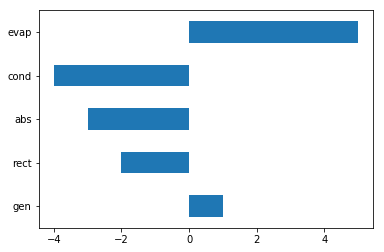

In [77]:
import matplotlib.pyplot as plt
df.Q.plot.barh()
plt.show()

In [143]:
df= pandas.DataFrame(columns=[
        'deltaT',
        'epsilon',
        'UA',
        'Q'],
        index='gen rect abs cond evap'.split())
df.loc['gen'] = [1,2,3,4]
df

,deltaT,epsilon,UA,Q
gen,1,2,3,4
rect,NaN,NaN,NaN,NaN
abs,NaN,NaN,NaN,NaN
cond,NaN,NaN,NaN,NaN
evap,NaN,NaN,NaN,NaN


In [135]:
df.Q[['evap','gen']]

evap    NaN
gen       4
Name: Q, dtype: object

In [136]:
for name in df:
    display(name)

'deltaT'

'epsilon'

'UA'

'Q'

In [148]:
import numpy
df.UA['rect'] is numpy.nan

True

In [204]:
df.UA['cond'] = {'oven':'hot','fridge':'cold'}
#df.loc['cond','UA']
print(df.to_csv())

,deltaT,epsilon,UA,Q
gen,1,2,3,4
rect,,,,
abs,,,,
cond,,,"{'oven': 'hot', 'fridge': 'cold'}",
evap,,,,



In [103]:
dfmi = pandas.DataFrame([list('abcd'),
                         list('efgh'),
                         list('ijkl'),
                         list('mnop')],
                        columns=pandas.MultiIndex.from_product([['one','two'],
                                                                ['first','second']]))
dfmi

one          two       
  first second first second
0     a      b     c      d
1     e      f     g      h
2     i      j     k      l
3     m      n     o      p

In [133]:
dfmi2 = pandas.DataFrame(index=pandas.MultiIndex.from_product([range(4),
                                                                range(3)],
                                                             names=['shoe','tie']),
                        columns=pandas.MultiIndex.from_product([['one','two'],
                                                                ['first','second']]))
dfmi2.loc[(0,0)] = (1,2,3,4)
dfmi2

one          two       
         first second first second
shoe tie                          
0    0       1      2     3      4
     1     NaN    NaN   NaN    NaN
     2     NaN    NaN   NaN    NaN
1    0     NaN    NaN   NaN    NaN
     1     NaN    NaN   NaN    NaN
     2     NaN    NaN   NaN    NaN
2    0     NaN    NaN   NaN    NaN
     1     NaN    NaN   NaN    NaN
     2     NaN    NaN   NaN    NaN
3    0     NaN    NaN   NaN    NaN
     1     NaN    NaN   NaN    NaN
     2     NaN    NaN   NaN    NaN

In [122]:
dfmi2.loc[(0,0),'one']

first     1
second    2
Name: (0, 0), dtype: object

In [132]:
dfmi2.loc[(:,0)]

SyntaxError: invalid syntax (<ipython-input-132-4f9e6245468e>, line 1)

In [121]:
for name in dfmi2.index:
    print(name)

(0, 0)
(0, 1)
(0, 2)
(1, 0)
(1, 1)
(1, 2)
(2, 0)
(2, 1)
(2, 2)
(3, 0)
(3, 1)
(3, 2)


In [177]:
dfmi2

one          two       
         first second first second
shoe tie                          
0    0       1      2     3      4
     1     NaN    NaN   NaN    NaN
     2     NaN    NaN   NaN    NaN
1    0     NaN    NaN   NaN    NaN
     1     NaN    NaN   NaN    NaN
     2     NaN    NaN   NaN    NaN
2    0     NaN    NaN   NaN    NaN
     1     NaN    NaN   NaN    NaN
     2     NaN    NaN   NaN    NaN
3    0     NaN    NaN   NaN    NaN
     1     NaN    NaN   NaN    NaN
     2     NaN    NaN   NaN    NaN

In [185]:
# Turns out, json is not implemented for MultiIndex
# The output has unescaped quotes and badness
fname = 'tempfile1.json'
with open(fname,'w') as f:
    dfmi2.to_json(f)
with open(fname,'r') as f:
    dfmi3 = pandas.read_json(f)
dfmi3

ValueError: No ':' found when decoding object value

In [186]:
# For this you need to install PyTables
fname = 'tempfile1.h5'
with open(fname,'w') as f:
    dfmi2.to_hdf(f,'dfmi2')
with open(fname,'r') as f:
    dfmi3 = pandas.read_json(f,'dfmi2')
dfmi3

AttributeError: '_io.TextIOWrapper' object has no attribute 'put'

In [207]:
fname = 'tempfile1.csv'
if False:
    with open(fname,'w') as f:
        dfmi2.to_csv(f)
with open(fname,'r') as f:
    #pandas.read_csv(f, header=[0,1])
    dfmi3 = pandas.read_csv(f, header=[0,1], index_col=[0,1])
dfmi3

one          two       
                                      first second first second
shoe tie                                                       
0    0                                    1    2.0   3.0    4.0
     1                                  NaN    NaN   NaN    NaN
     2                                  NaN    NaN   NaN    NaN
1    0    {'oven': 'hot', 'fridge': 'cold'}    NaN   NaN    NaN
     1                                  NaN    NaN   NaN    NaN
     2                                  NaN    NaN   NaN    NaN
2    0                                  NaN    NaN   NaN    NaN
     1                                  NaN    NaN   NaN    NaN
     2                                  NaN    NaN   NaN    NaN
3    0                                  NaN    NaN   NaN    NaN
     1                                  NaN    NaN   NaN    NaN
     2                                  NaN    NaN   NaN    NaN

In [188]:
fname = 'tempfile1.html'
with open(fname,'w') as f:
    dfmi2.to_html(f)
with open(fname,'r') as f:
    dfmi3 = pandas.read_html(f)
dfmi3

ImportError: lxml not found, please install it

In [74]:
import scipy.optimize
?scipy.optimize.optimize.OptimizeResult

In [76]:
from numpy import array
opt=scipy.optimize.optimize.OptimizeResult(
    x=array([1/11,2/11,3/11,4/11,"bean:s"]*2),
    success=True,
    fun=5,
    message='You are crazy and \nso am I\nx:',
    hess_inv=lambda x:x)
opt

      fun: 5
 hess_inv: <function <lambda> at 0x08902618>
  message: 'You are crazy and \nso am I\nx:'
  success: True
        x: array(['0.09090909090909091', '0.18181818181818182', '0.2727272727272727',
       '0.36363636363636365', 'bean:s', '0.09090909090909091',
       '0.18181818181818182', '0.2727272727272727', '0.36363636363636365',
       'bean:s'],
      dtype='<U32')

In [77]:
dict(opt)

{'fun': 5,
 'hess_inv': <function __main__.<lambda>>,
 'message': 'You are crazy and \nso am I\nx:',
 'success': True,
 'x': array(['0.09090909090909091', '0.18181818181818182', '0.2727272727272727',
        '0.36363636363636365', 'bean:s', '0.09090909090909091',
        '0.18181818181818182', '0.2727272727272727', '0.36363636363636365',
        'bean:s'],
       dtype='<U32')}

In [59]:
s = opt.__repr__()
scipy.optimize.optimize.OptimizeResult(s)

ValueError: dictionary update sequence element #0 has length 1; 2 is required

In [65]:
for i,line in enumerate(s.split('\n')):
    print(i, line)
    print("x:" in line)

0      fun: 5
False
1  success: True
False
2        x: array(['0.09090909090909091', '0.18181818181818182', '0.2727272727272727',
True
3        '0.36363636363636365', 'bean:s', '0.09090909090909091',
False
4        '0.18181818181818182', '0.2727272727272727', '0.36363636363636365',
False
5        'bean:s'],
False
6       dtype='<U32')
False


In [73]:
import re
re.split(r'\s+(\w+):', s)

['',
 'fun',
 ' 5',
 'success',
 ' True',
 'x',
 " array(['0.09090909090909091', '0.18181818181818182', '0.2727272727272727',\n       '0.36363636363636365', 'bean:s', '0.09090909090909091',\n       '0.18181818181818182', '0.2727272727272727', '0.36363636363636365',\n       'bean:s'],\n      dtype='<U32')"]

# TOC

In [1]:
%%html
<pre id="TOC-markdown">TOC will be here</pre>
<script>
$("#TOC-markdown").html(
    $('h1,h2,h3').filter(":has(a)").map(function(){
        var empties = "  ".repeat($(this).prop("tagName")[1]);
        var title = $(this).text();
        var url = $(this).children().attr("href");
        return `${empties}- [${title}](${url})`;
    }).get().join("\n")
);
</script>